# **SPECIES CLASSIFICATION USING KNN (K Nearest Neighbors) Classification**

# **1>IMPORT NECESSARY LIBRARIES AND LOAD THE DATASET**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/nanthansnair/Downloads/VIT-MLfR/Species copy.csv')
df.head()

,paw length,claw length,wiskers length,tail length,species
0,5.1,3.5,1.4,0.2,cat
1,4.9,3.0,1.4,0.2,cat
2,4.7,3.2,1.3,0.2,cat
3,4.6,3.1,1.5,0.2,cat
4,5.0,3.6,1.4,0.2,cat


# **2> ANALYSIS OF THE DATASET**

In [3]:
df

,paw length,claw length,wiskers length,tail length,species
0,5.1,3.5,1.4,0.2,cat
1,4.9,3.0,1.4,0.2,cat
2,4.7,3.2,1.3,0.2,cat
3,4.6,3.1,1.5,0.2,cat
4,5.0,3.6,1.4,0.2,cat
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,lion
146,6.3,2.5,5.0,1.9,lion
147,6.5,3.0,5.2,2.0,lion
148,6.2,3.4,5.4,2.3,lion


In [4]:
df.info

<bound method DataFrame.info of      paw length  claw length  wiskers length  tail length species
0           5.1          3.5             1.4          0.2     cat
1           4.9          3.0             1.4          0.2     cat
2           4.7          3.2             1.3          0.2     cat
3           4.6          3.1             1.5          0.2     cat
4           5.0          3.6             1.4          0.2     cat
..          ...          ...             ...          ...     ...
145         6.7          3.0             5.2          2.3    lion
146         6.3          2.5             5.0          1.9    lion
147         6.5          3.0             5.2          2.0    lion
148         6.2          3.4             5.4          2.3    lion
149         5.9          3.0             5.1          1.8    lion

[150 rows x 5 columns]>

# **3> THE SPECIES COLUMN HAS STRING VALUES SO CATEGORISE THEM TO NUMBERS**

In [5]:
df['species'] = df['species'].astype('category').cat.codes

In [6]:
df.head(140)

,paw length,claw length,wiskers length,tail length,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,1
136,6.3,3.4,5.6,2.4,1
137,6.4,3.1,5.5,1.8,1
138,6.0,3.0,4.8,1.8,1


In [7]:
df.tail(70)

,paw length,claw length,wiskers length,tail length,species
80,5.5,2.4,3.8,1.1,2
81,5.5,2.4,3.7,1.0,2
82,5.8,2.7,3.9,1.2,2
83,6.0,2.7,5.1,1.6,2
84,5.4,3.0,4.5,1.5,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# **4> SPLIT THE DATASET AND PLOT THE KNOW THE VARIATION OF VALUES**

In [8]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

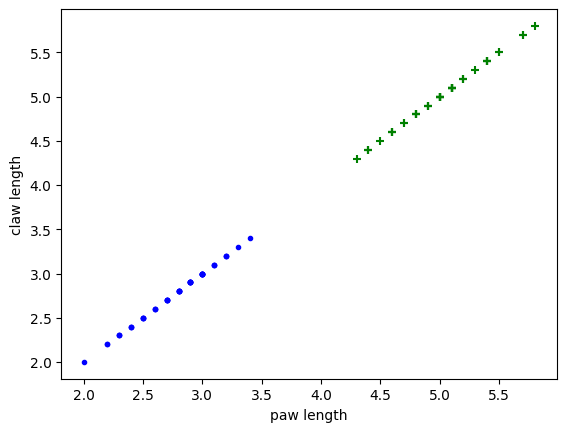

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('paw length')
plt.ylabel('claw length')
plt.scatter(df0['paw length'], df0['paw length'],color="green",marker='+')
plt.scatter(df1['claw length'], df1['claw length'],color="blue",marker='.')

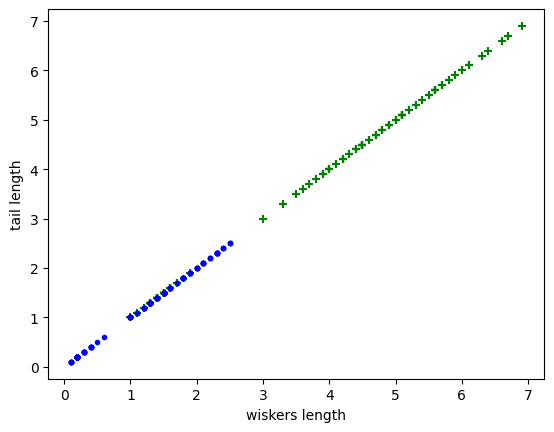

In [43]:
plt.xlabel('wiskers length')
plt.ylabel('tail length')
plt.scatter(df['wiskers length'], df['wiskers length'],color="green",marker='+')
plt.scatter(df['tail length'], df['tail length'],color="blue",marker='.')

In [44]:
from sklearn.preprocessing import StandardScaler 

# **5> IMPORT SEABORN TO DRAW THE SCATTERPLOT DIAGRAM**

In [45]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

<Axes: xlabel='wiskers length', ylabel='tail length'>

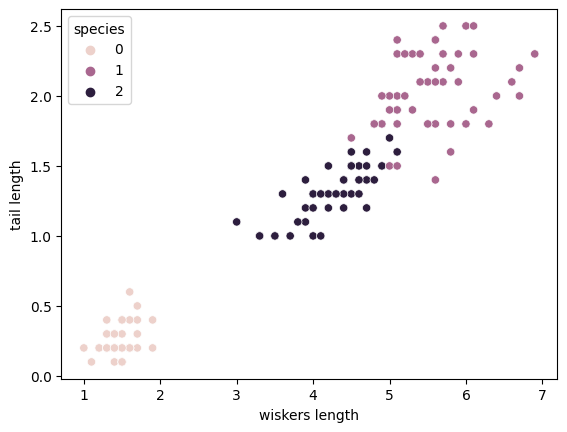

In [46]:
import seaborn as sns 
sns.scatterplot(x=df['wiskers length'],y=df['tail length'], hue=df['species'])


# **6> SPLIT THE DATASET INTO TEST AND TRAIN**

In [47]:
from sklearn.model_selection import train_test_split
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
len(X_train)

120

In [49]:
len(X_test)

30

# **7> USE KNEIGHBOURS-CLASSIFIER TO CLASSIFY THE GIVEN DATASET**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#THE K VALUE IS SET TO 5 

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
knn.score(X_test, y_test)

0.9666666666666667

In [53]:
knn.predict([[6.2,3.4,5.4,2.3]])

array([1], dtype=int8)

# **8> USE MATPLOTLIB TO PLOT THE GRAPH FOR VARIYING POINTS**

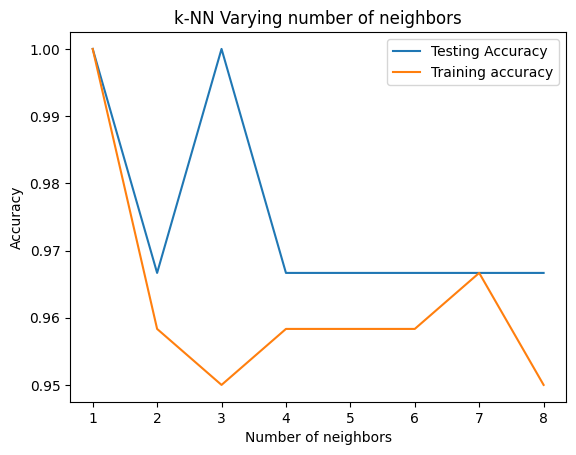

In [63]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# **9> PLOT THE CONFUSION MATRIX**

In [58]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 12]])

Text(58.222222222222214, 0.5, 'Truth')

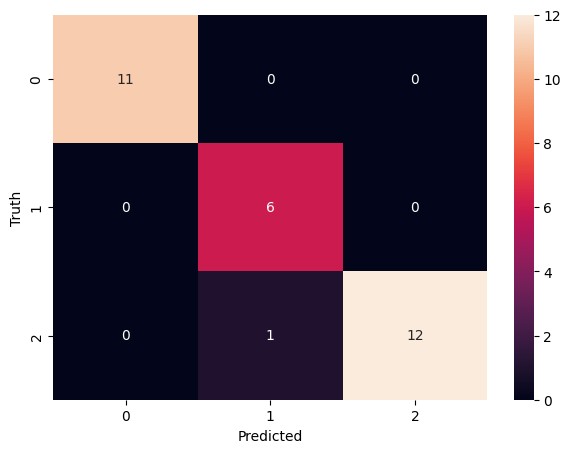

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **10> CHECK THE CLASSIFICATION REPORT**

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

